In [3]:
"""
    The contents of this file has not been used in the thesis, but was used to experiment with the MFCC
"""

import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import librosa.display

In [4]:
BASE_DIR = "C:/Users/Marianne Pettersen/PycharmProjects/SoundAnalysisProject/tubeleak/lab/1"
soundfiles = [name for name in os.listdir(BASE_DIR)]
half = int(len(soundfiles)/2)
files_no_leak = soundfiles[:half]
files_leak = soundfiles[half:]

def calculate_mfccs(files):
    mfccs = []
    for i in range(len(files)):
        file = files[i]
        signal, sr = librosa.load(os.path.join(BASE_DIR, file))
        S, phase = librosa.magphase(librosa.stft(y=signal)) # compute magnitude and phase content
        mfcc = librosa.feature.mfcc(S=S) # compute mfcc
        mfccs.append(mfcc)
    return mfccs

mfccs_leak = calculate_mfccs(files_leak)
print(len(mfccs_leak))

64


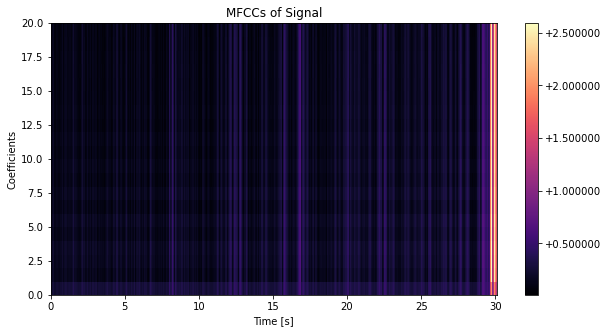

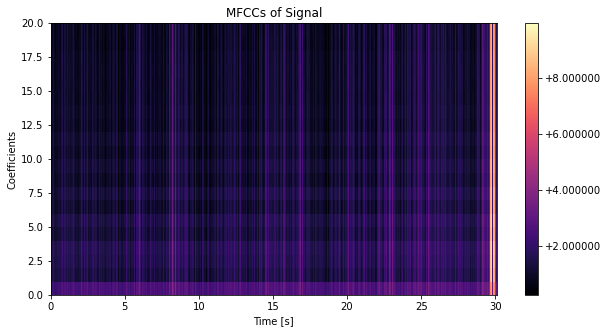

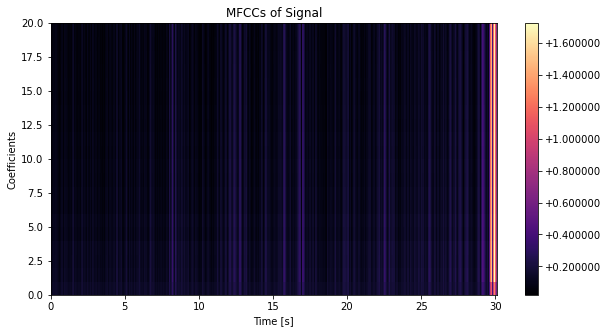

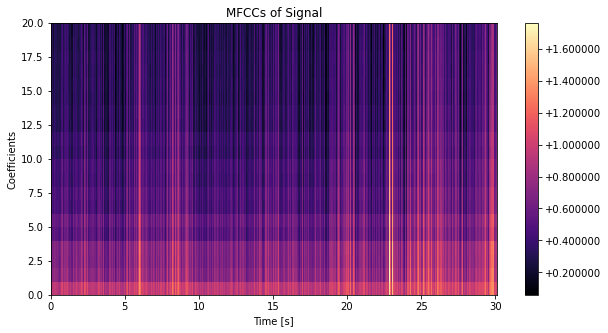

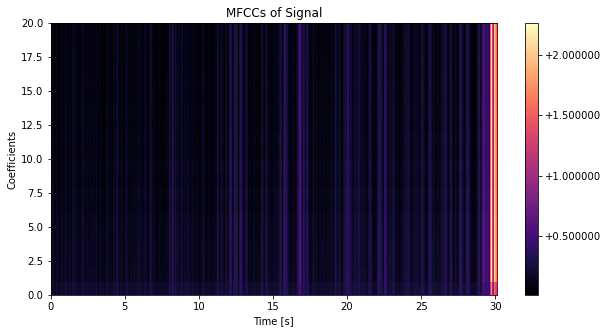

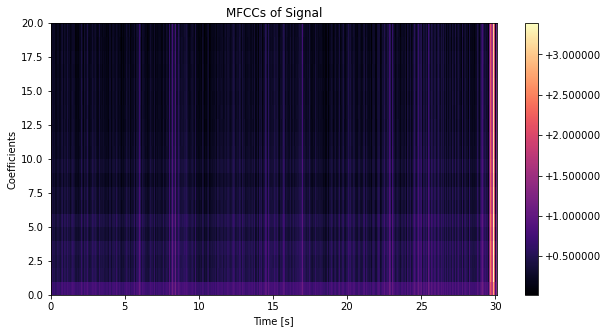

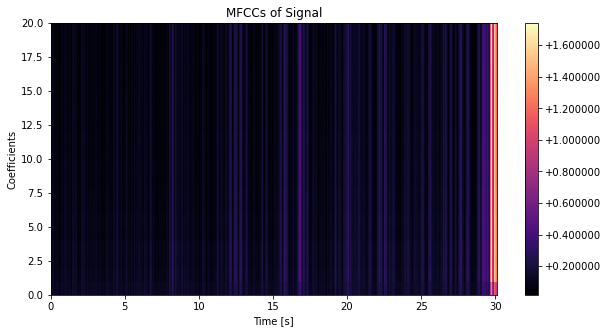

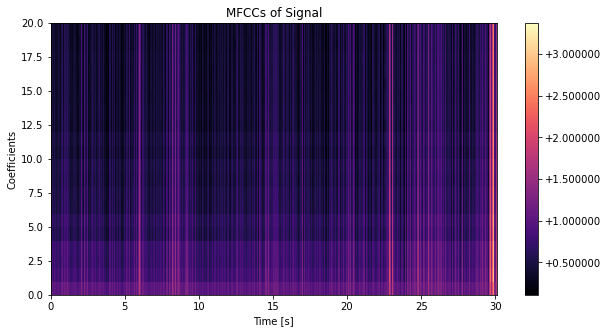

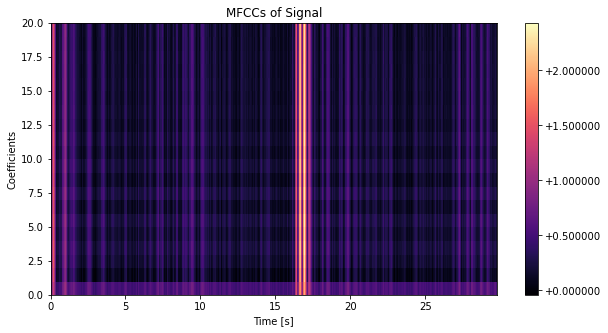

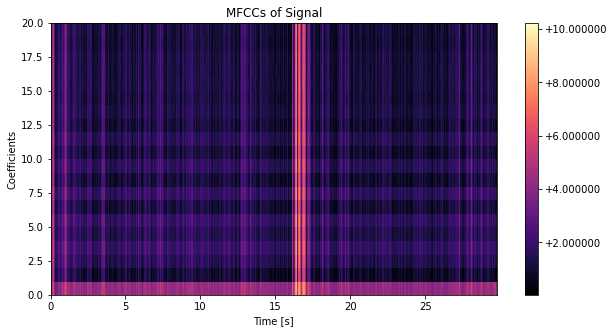

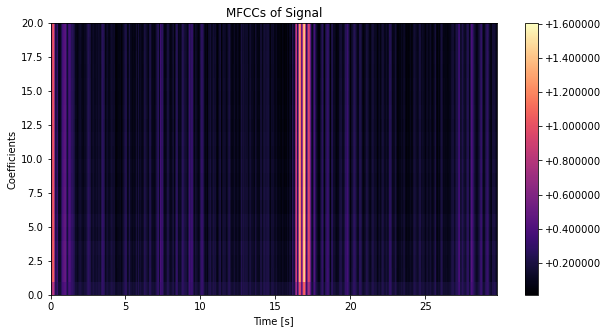

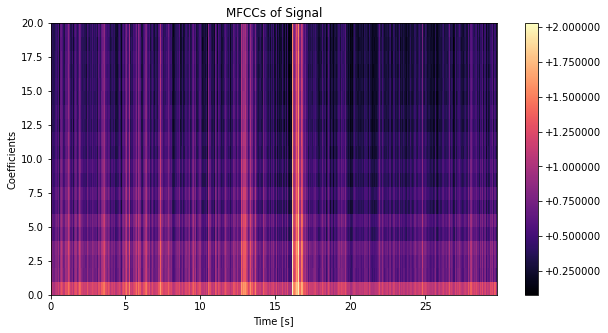

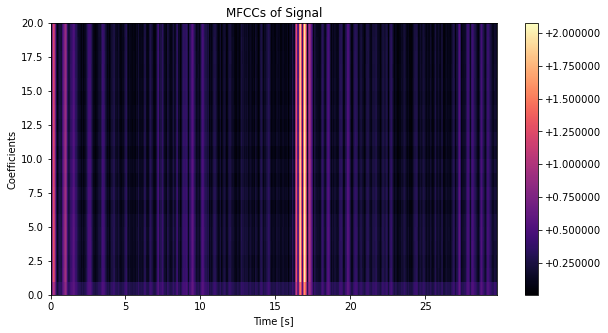

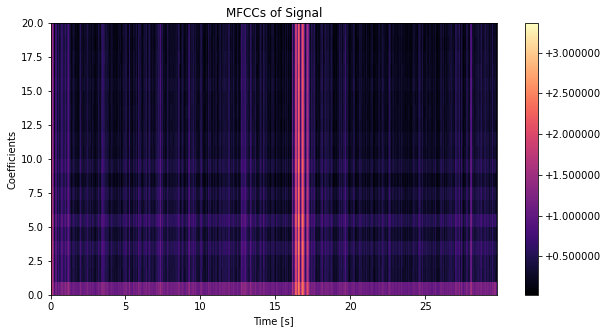

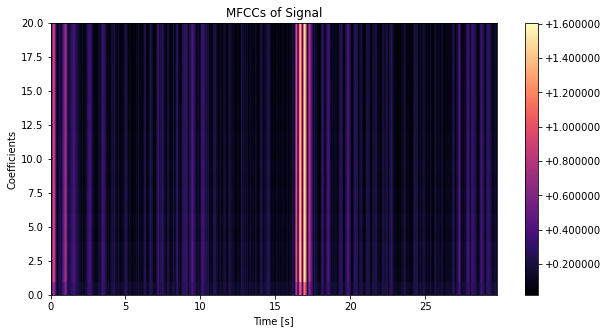

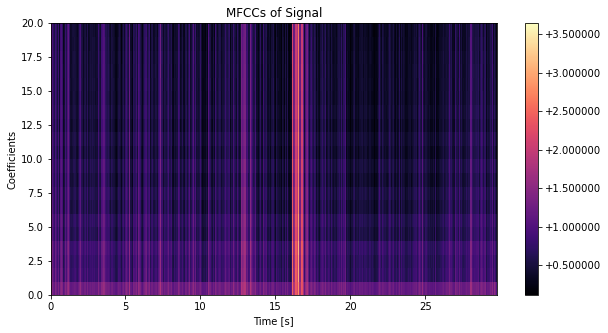

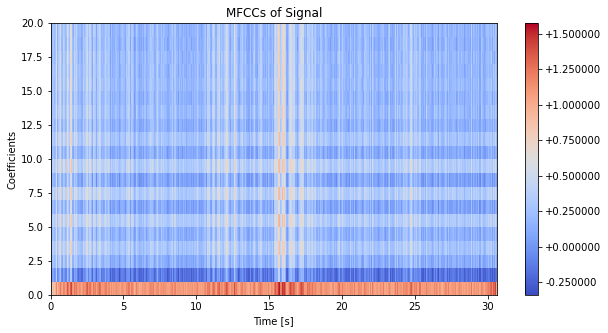

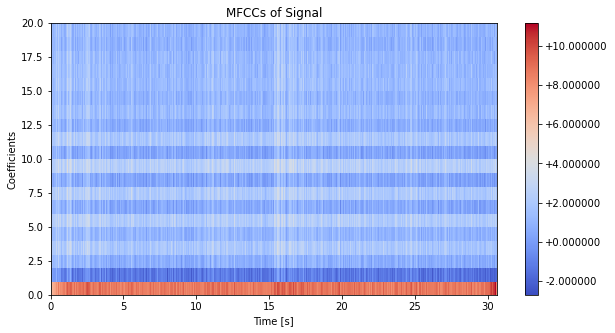

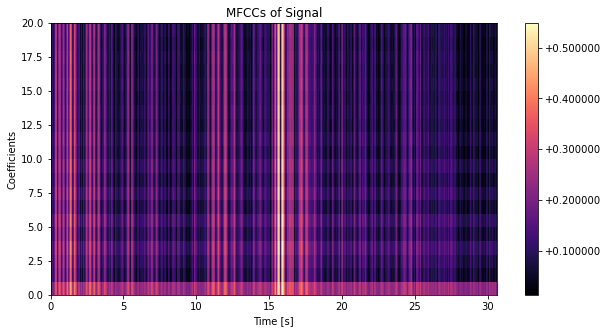

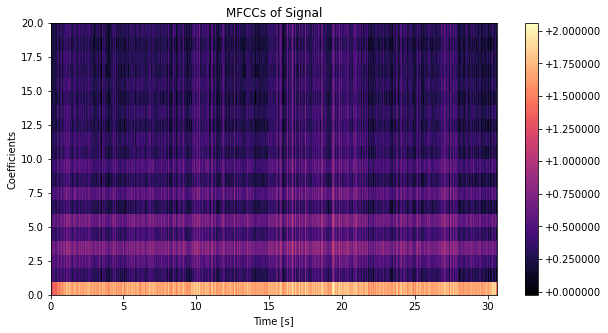

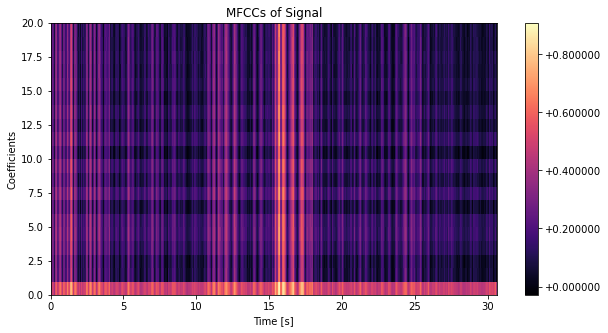

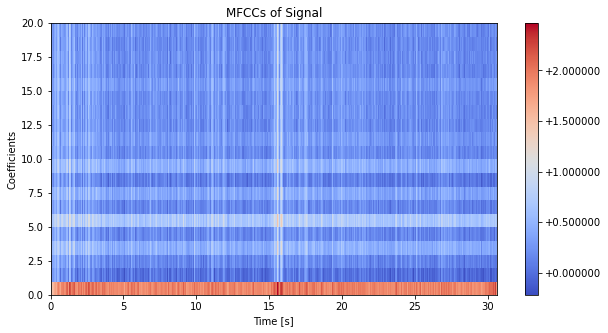

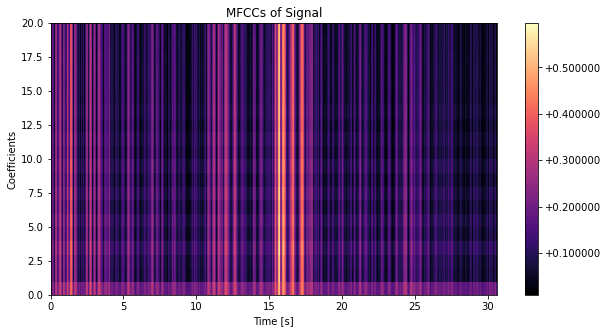

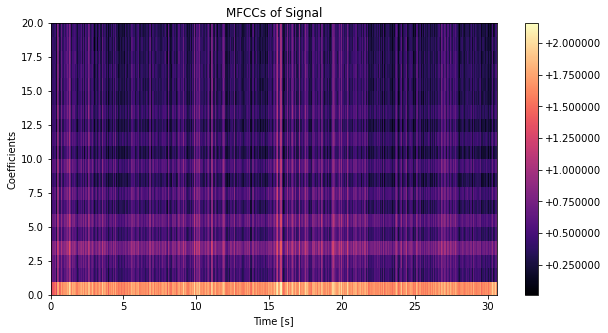

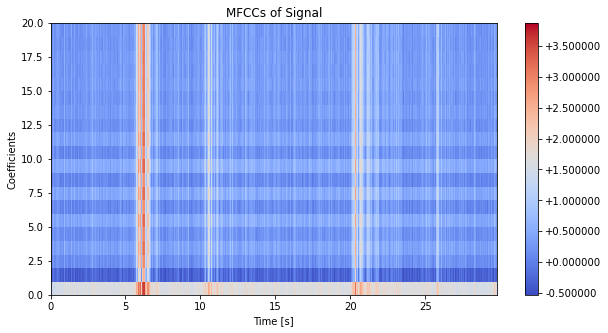

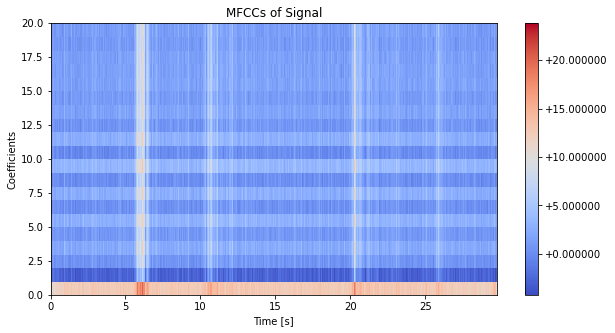

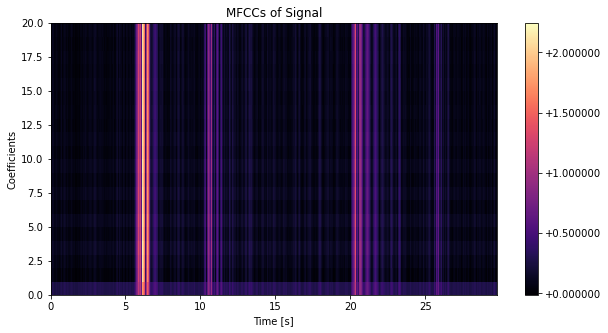

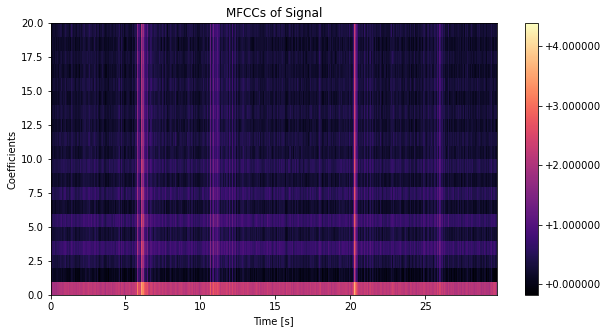

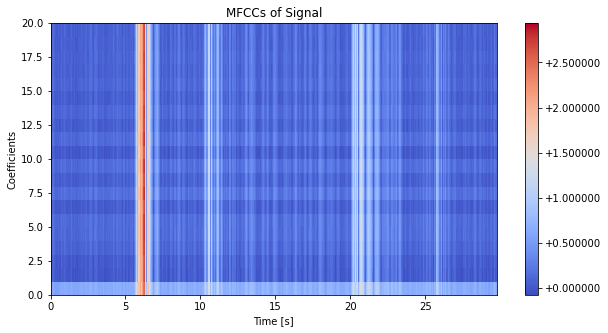

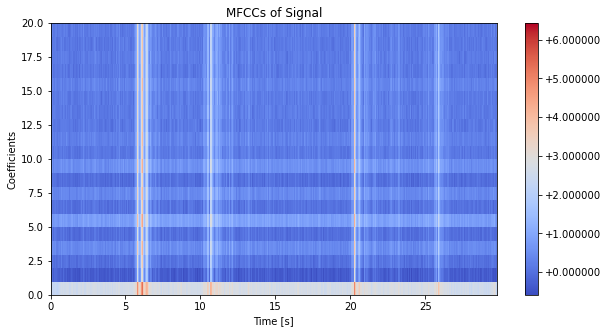

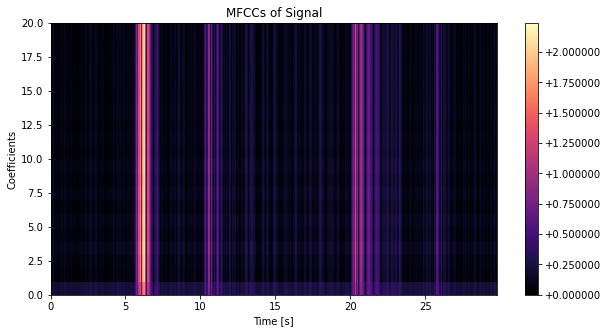

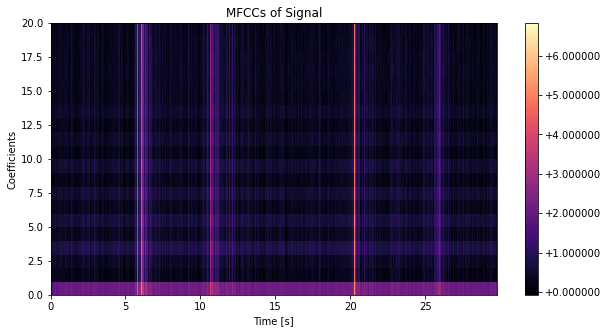

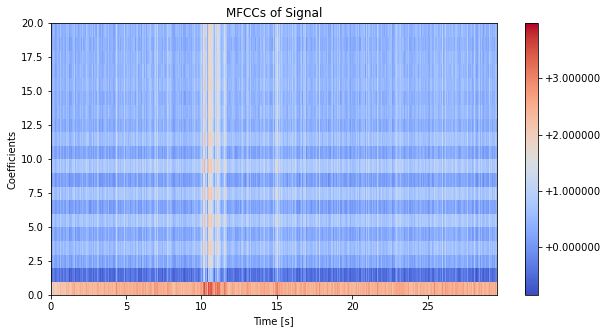

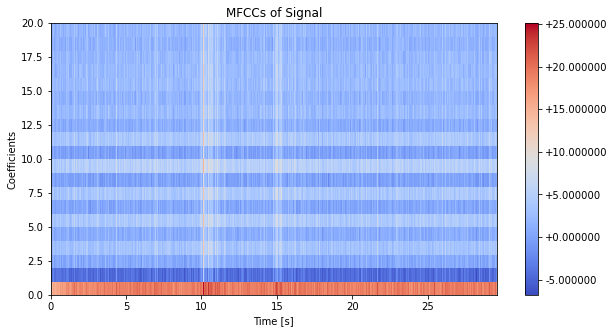

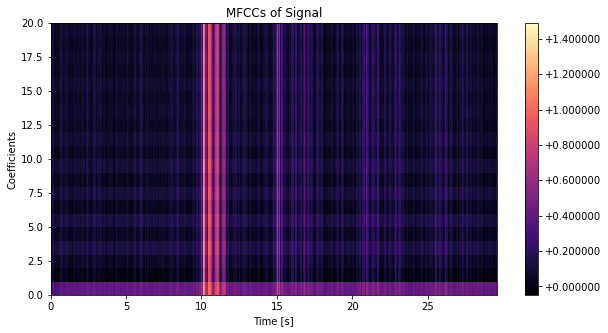

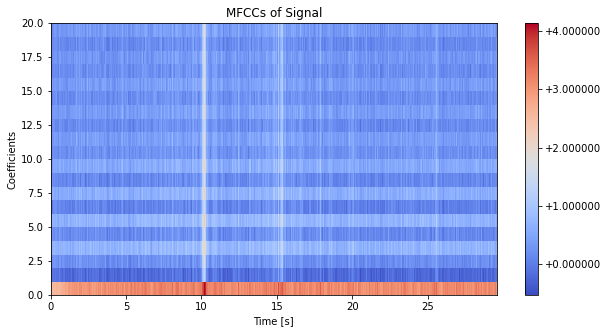

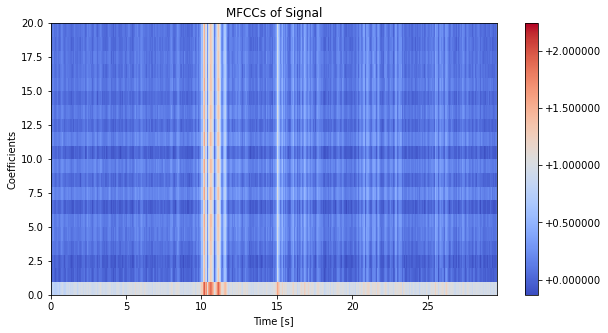

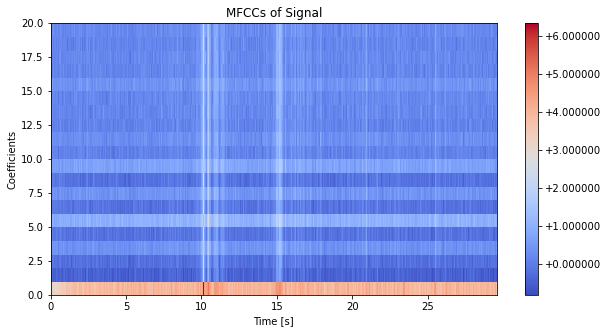

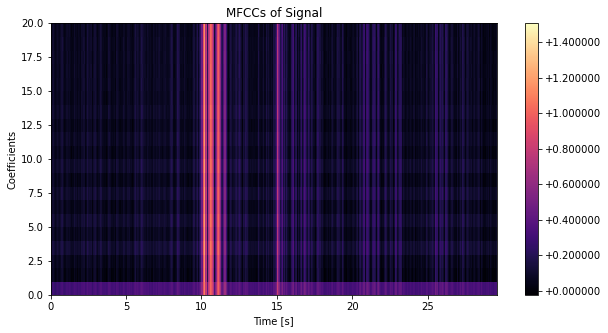

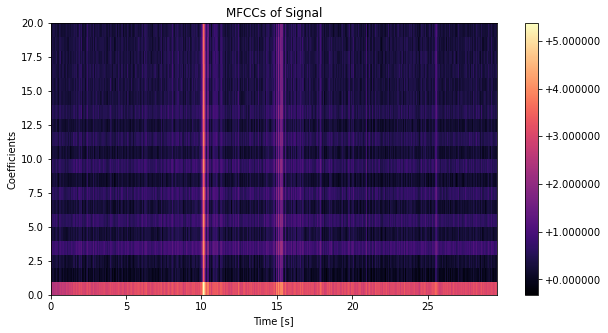

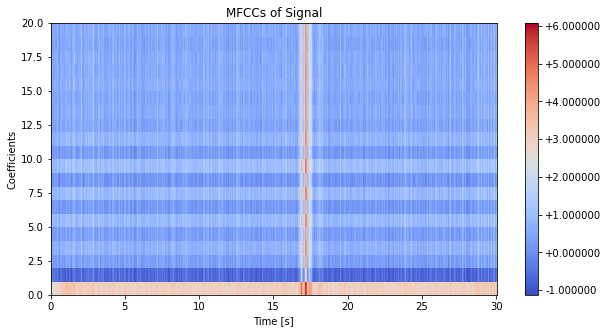

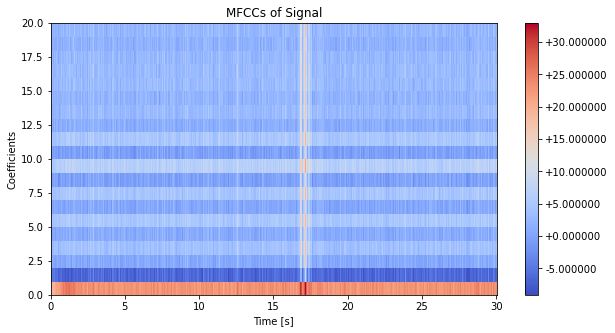

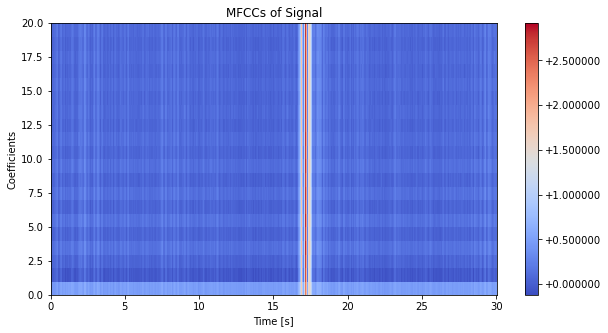

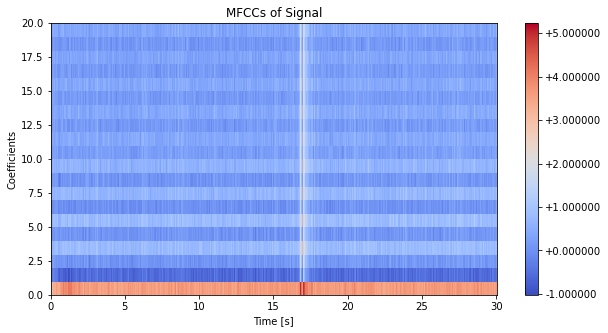

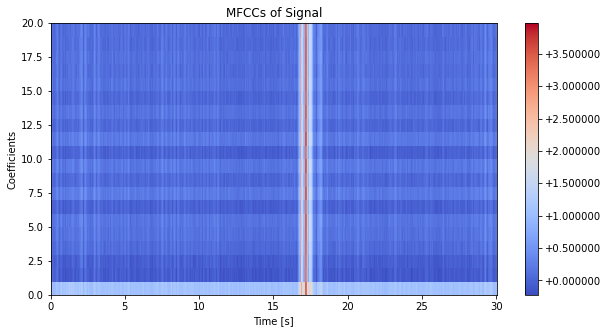

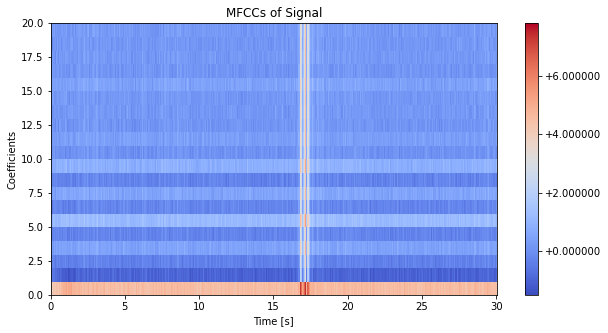

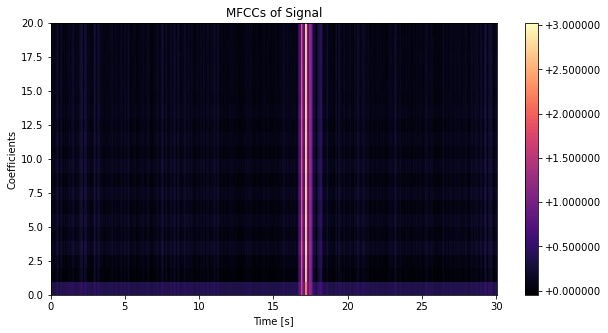

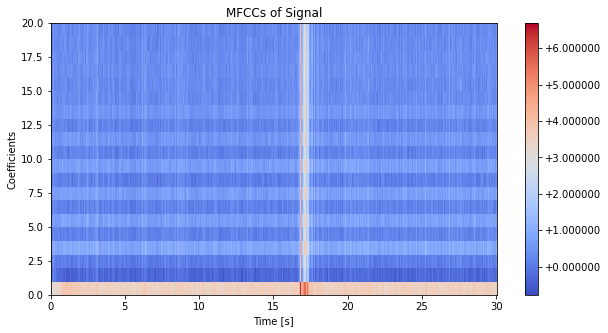

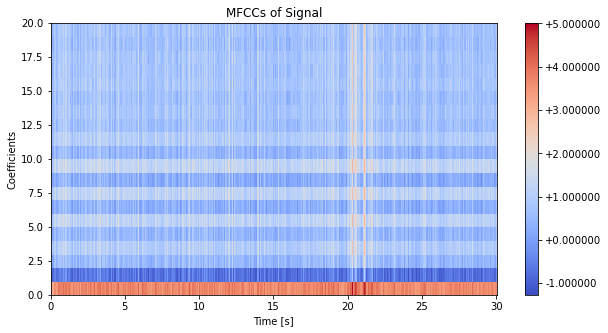

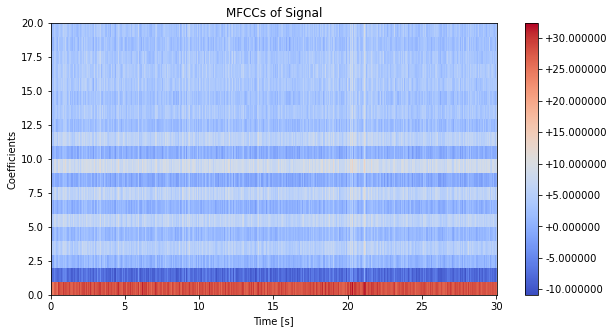

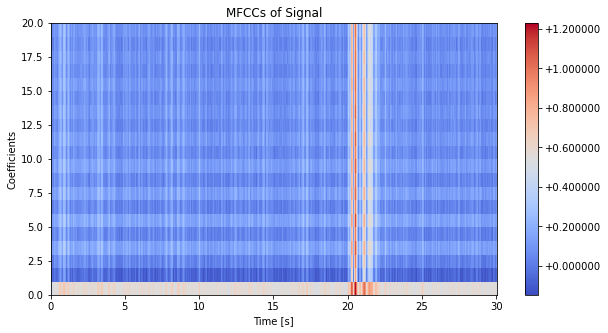

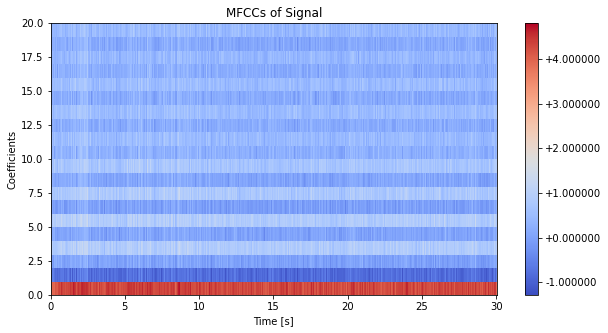

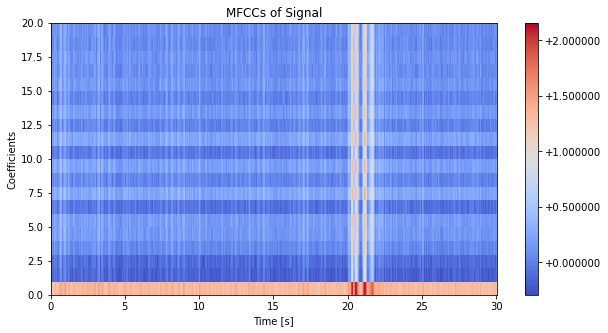

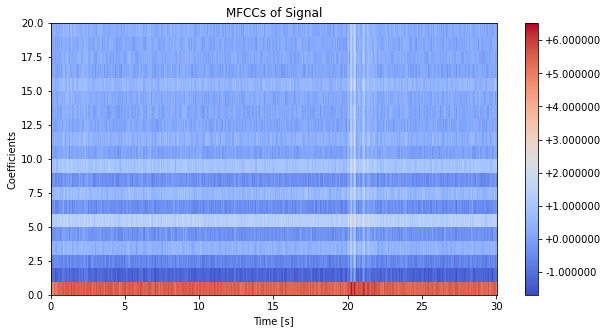

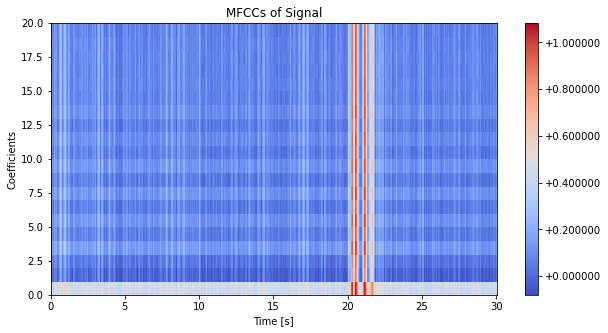

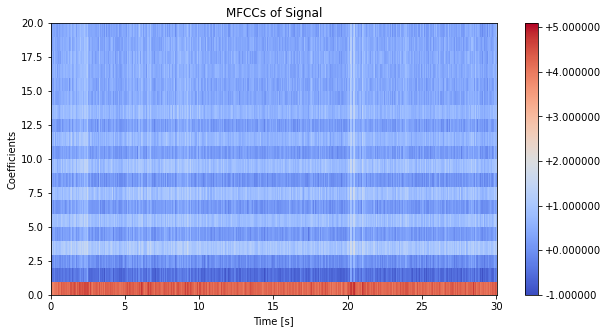

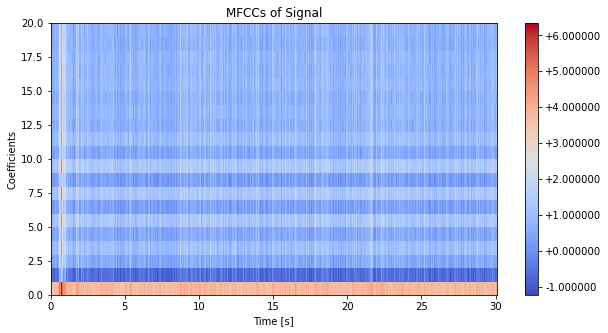

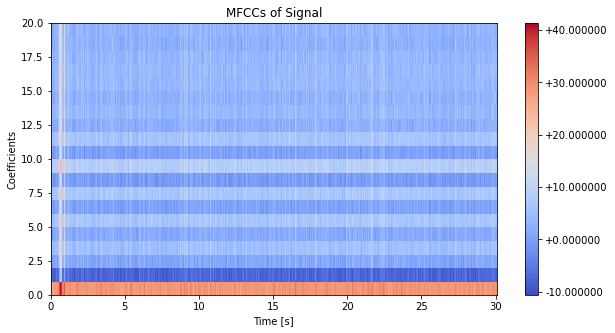

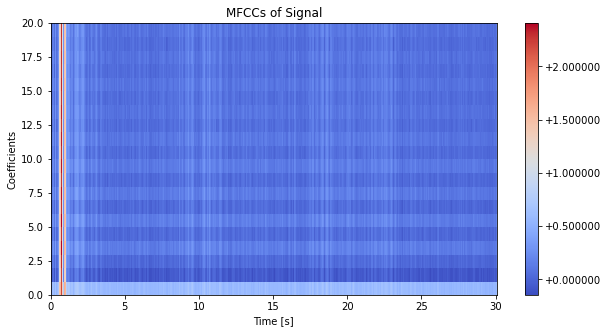

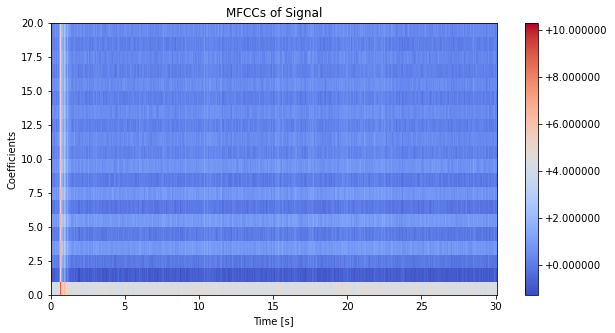

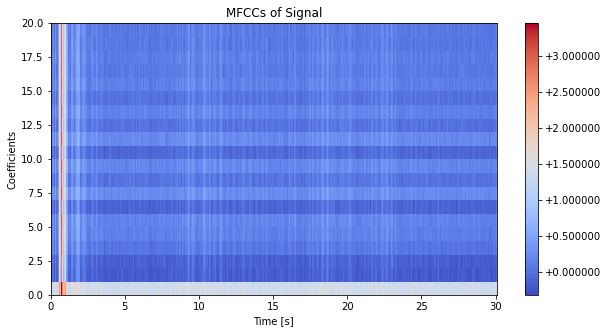

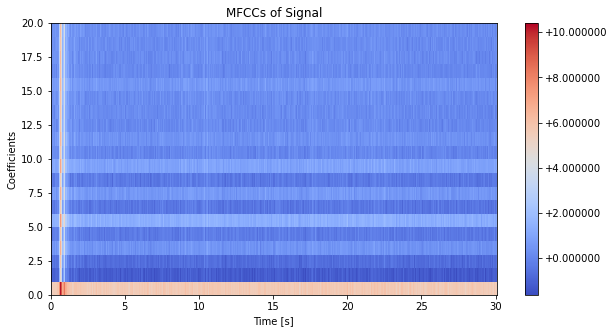

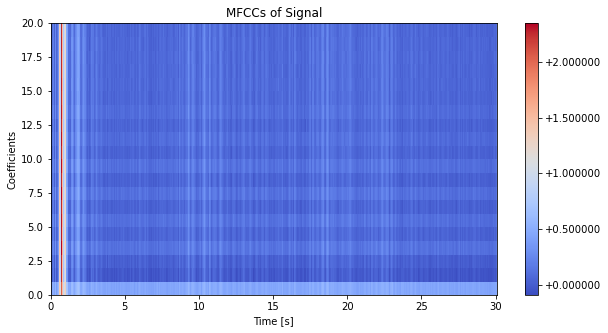

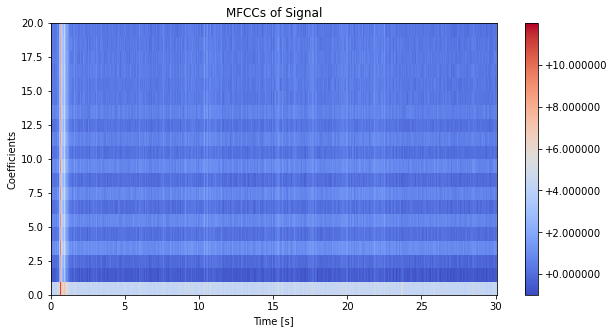

In [9]:
def plot_mfcc(data):
    # Visualizing the MFCCs of the leakage file
    plt.figure(figsize=(10,5))
    librosa.display.specshow(data, sr=22050, x_axis='time', y_axis='frames')
    plt.ylabel("Coefficients")
    plt.xlabel("Time [s]")
    plt.title("MFCCs of Signal with leaks")
    plt.colorbar(format="%+2f")
    plt.show()
    
for mfcc in mfccs_leak:
    plot_mfcc(mfcc)

In [10]:
mfccs_no_leak = calculate_mfccs(files_no_leak)

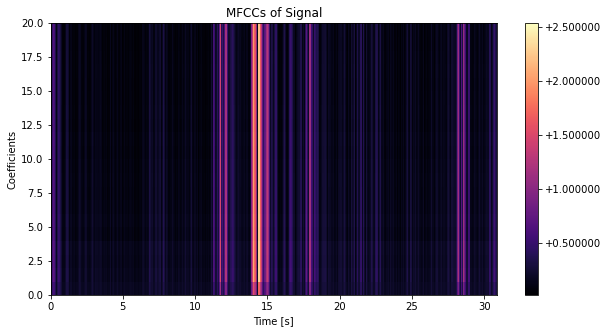

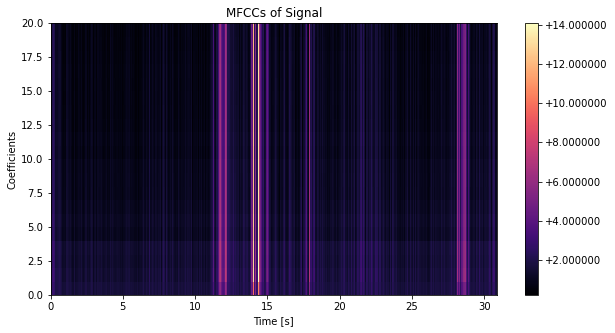

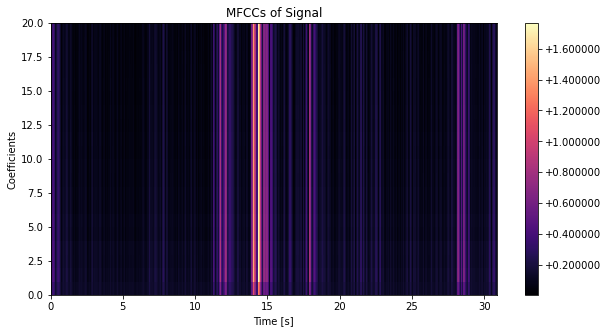

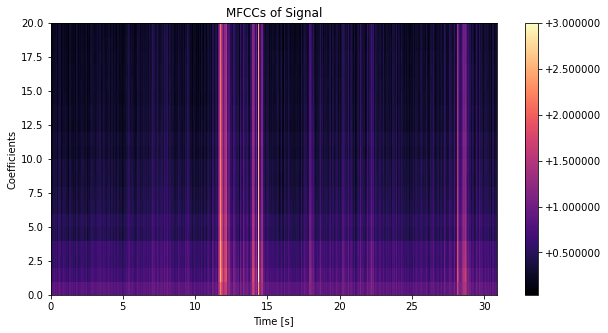

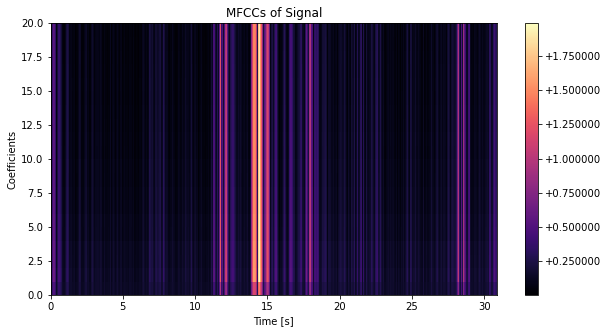

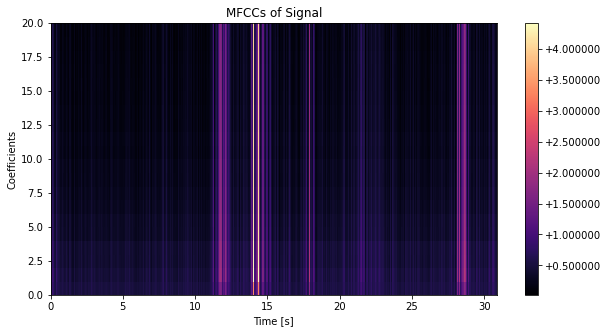

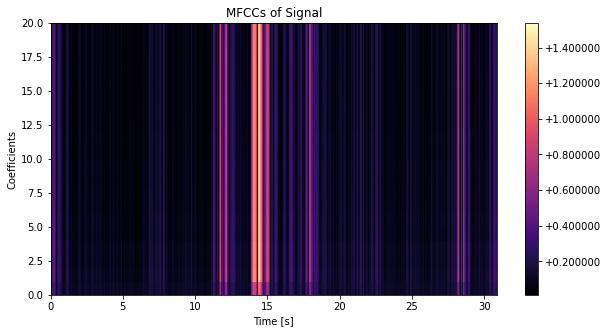

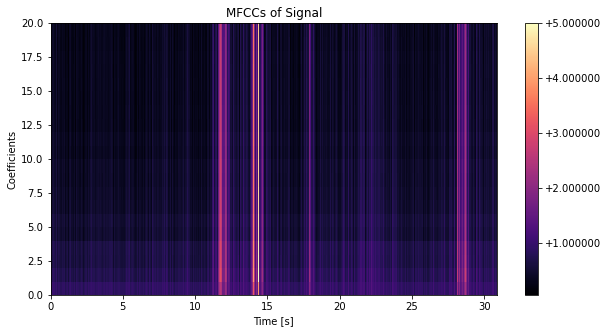

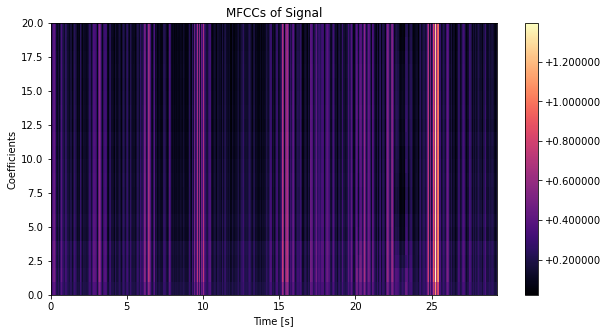

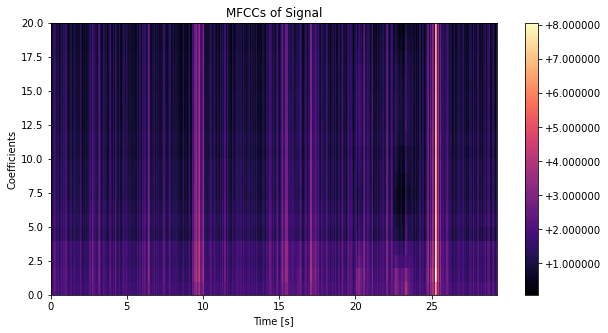

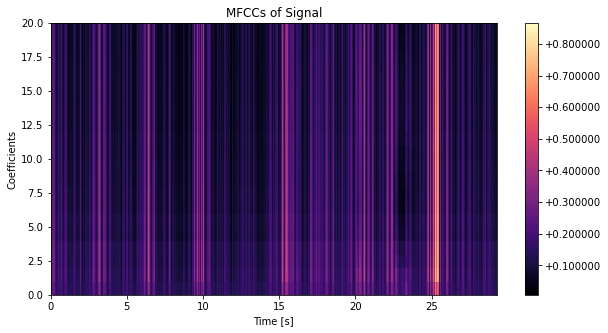

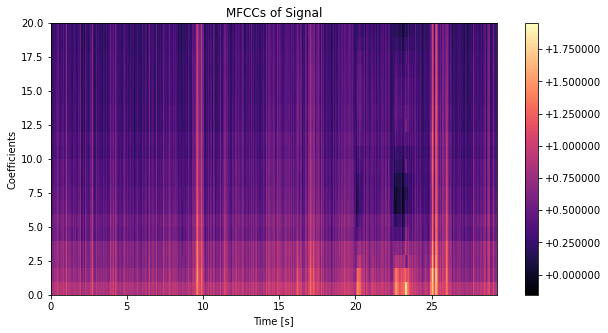

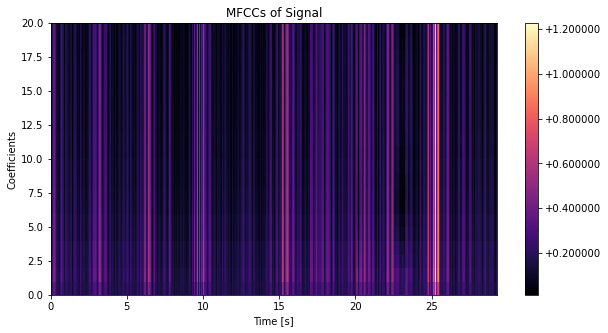

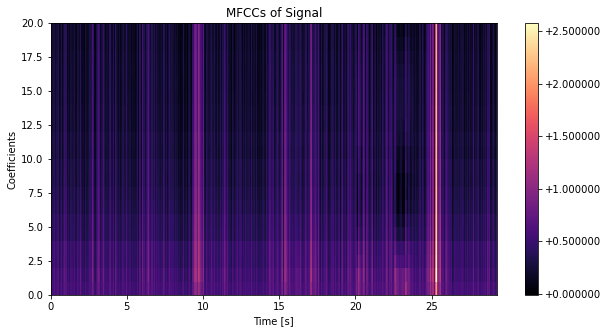

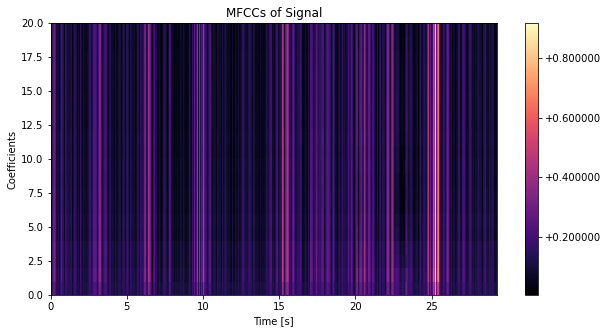

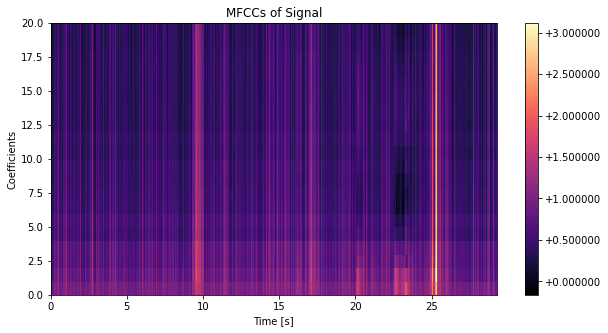

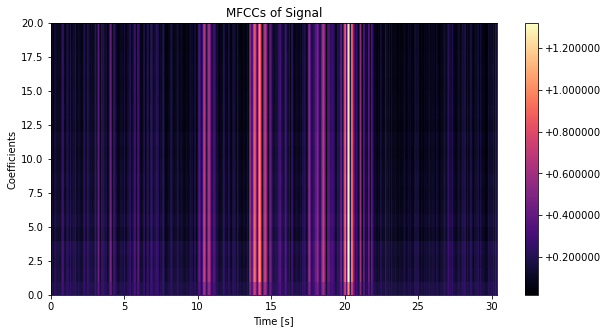

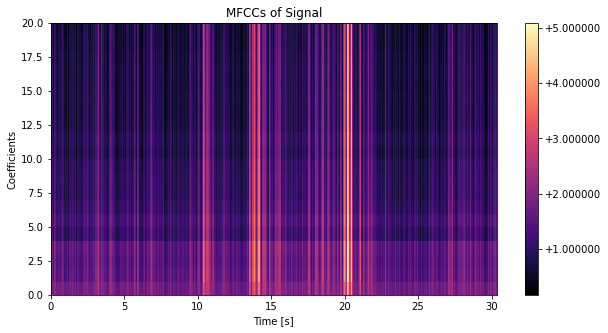

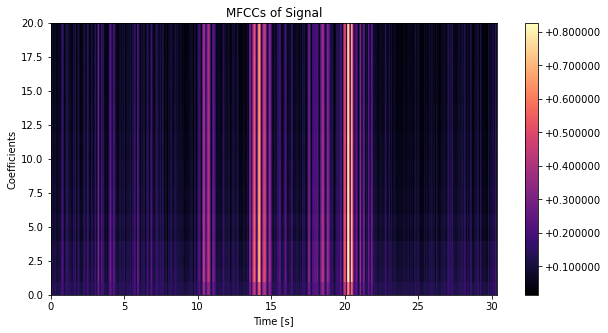

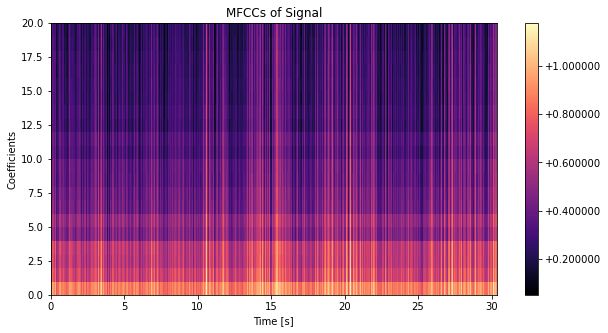

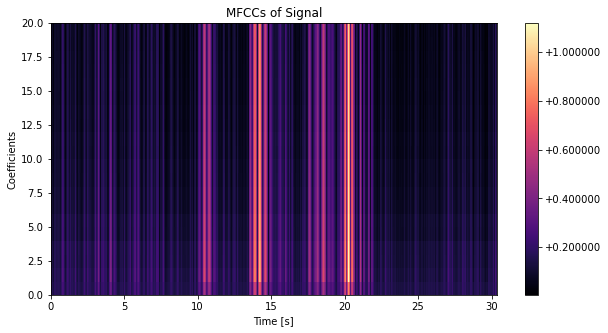

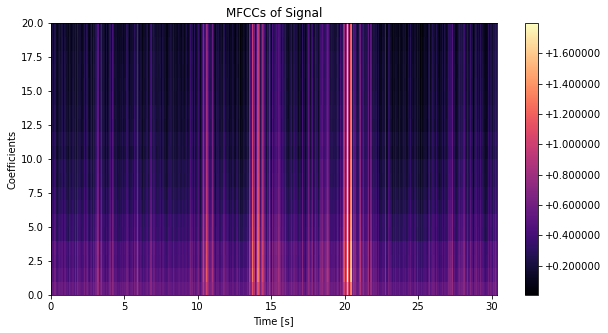

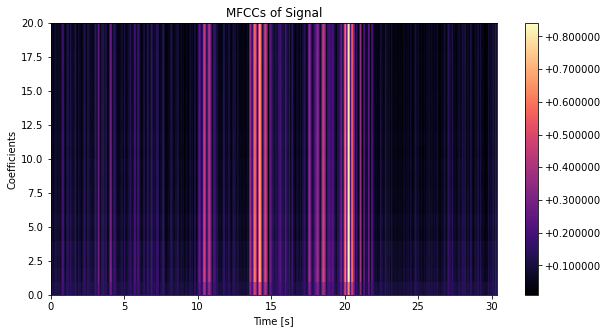

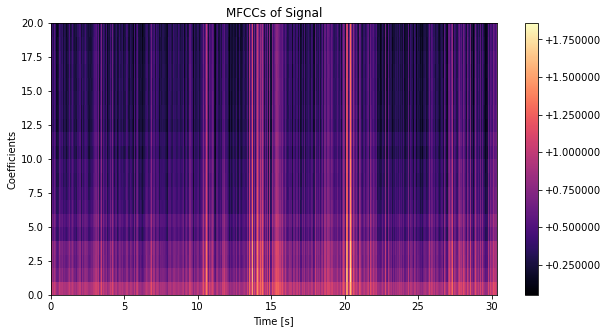

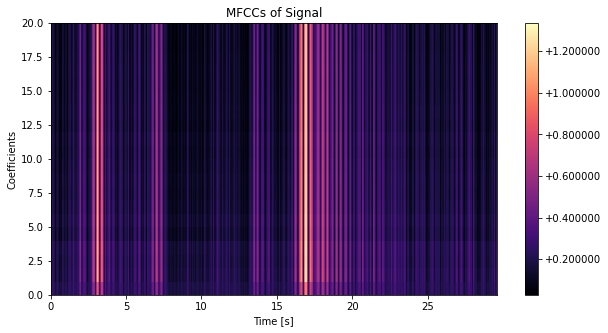

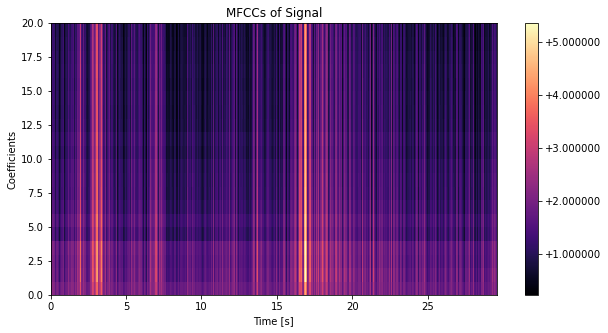

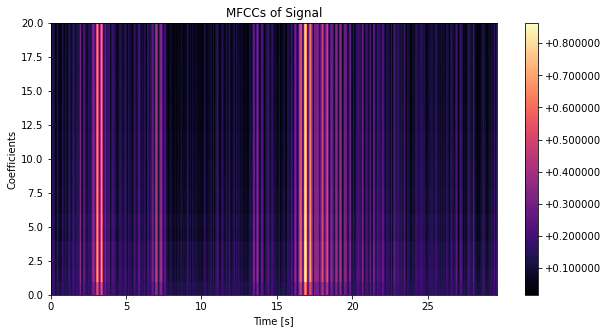

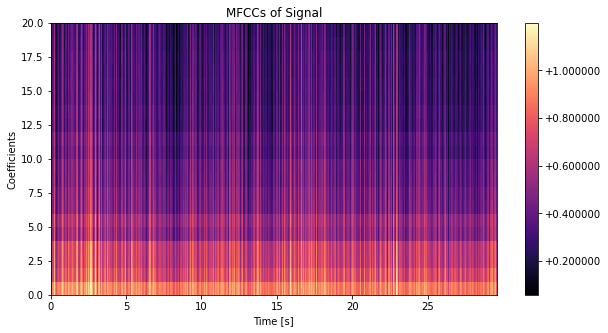

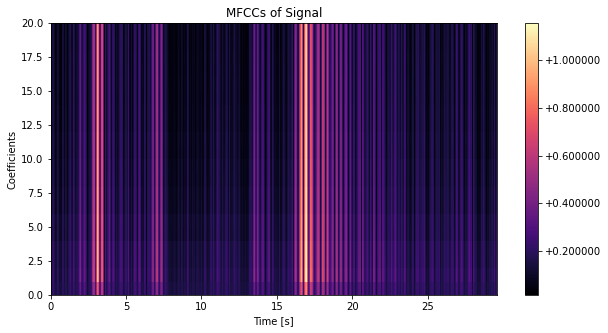

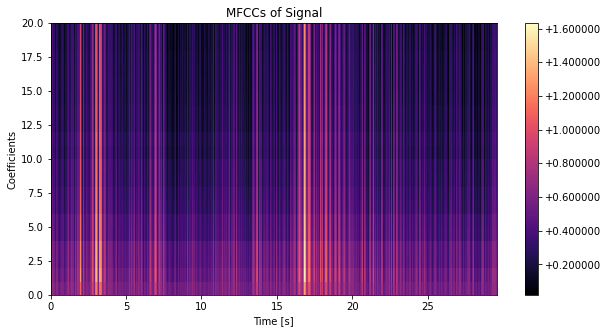

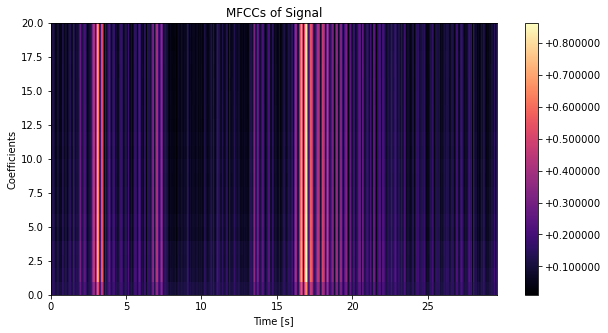

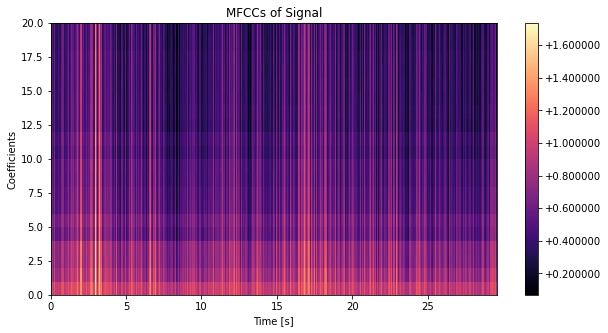

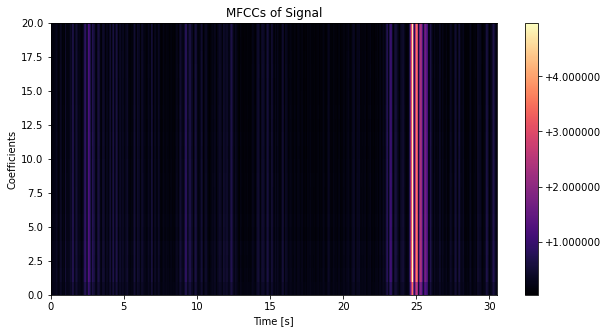

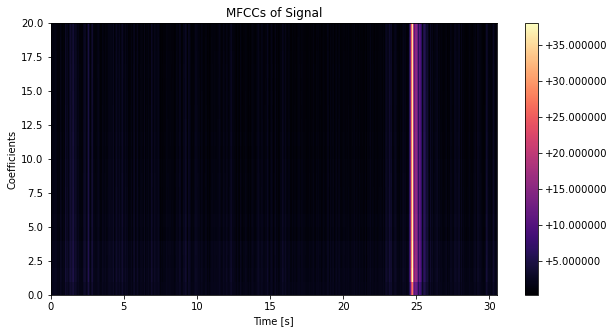

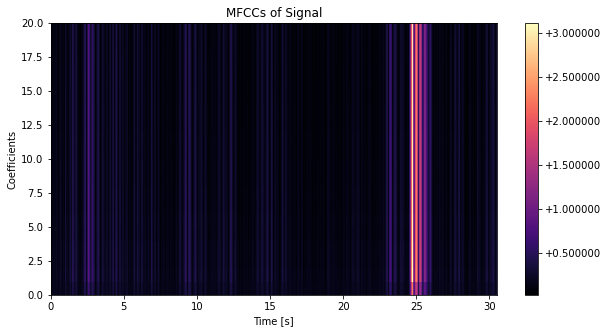

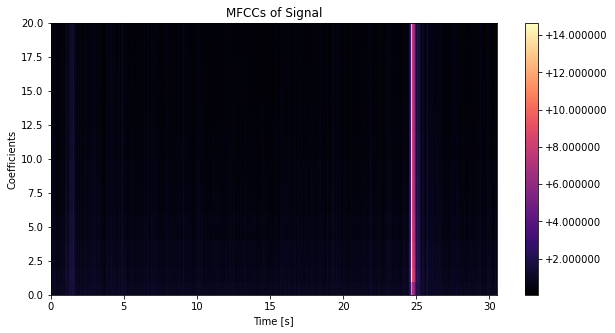

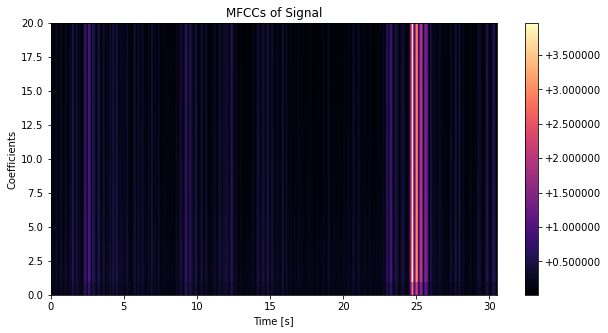

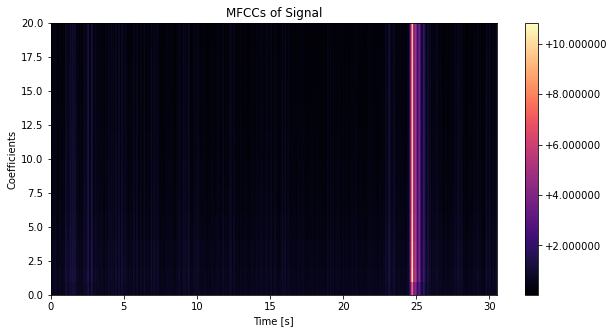

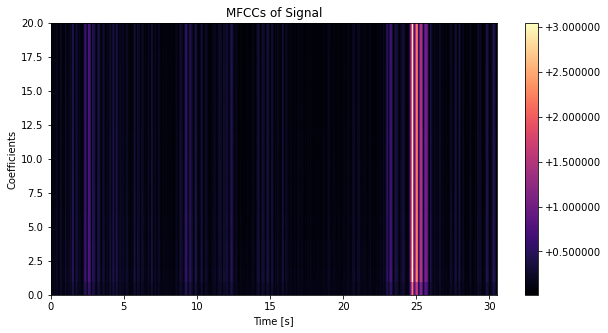

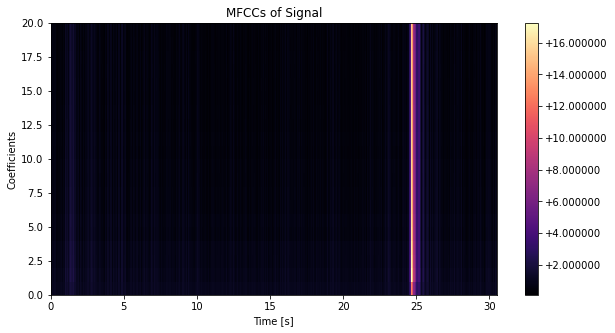

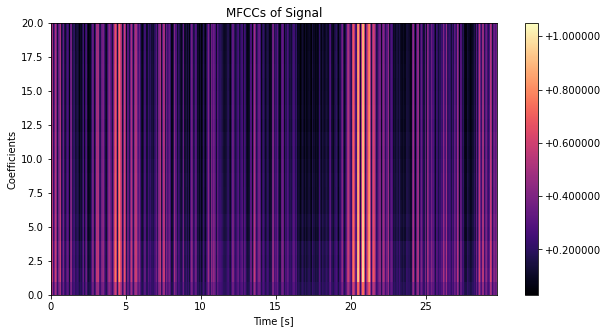

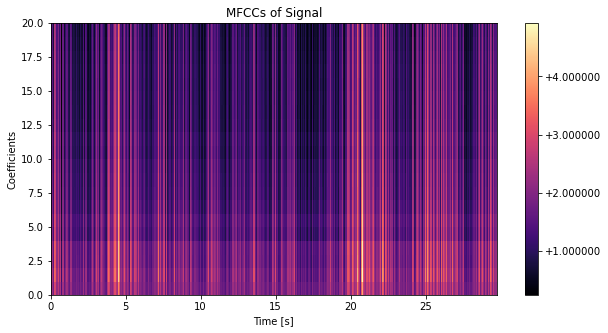

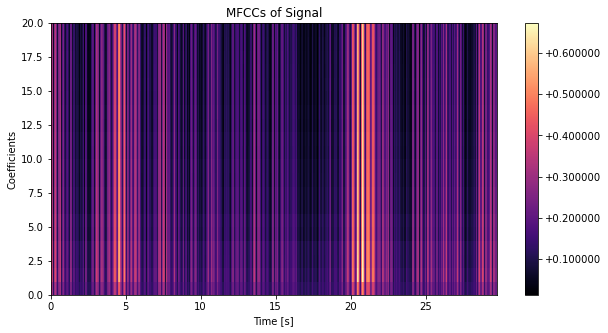

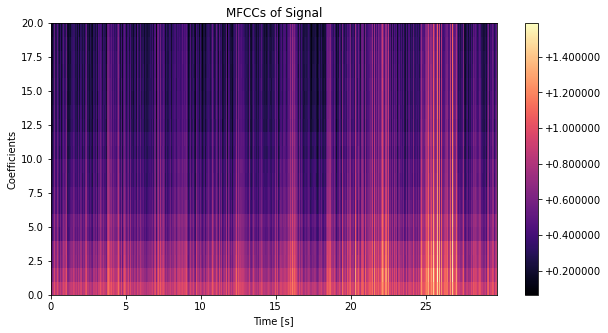

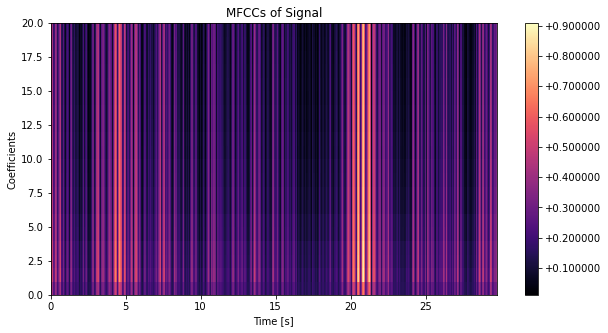

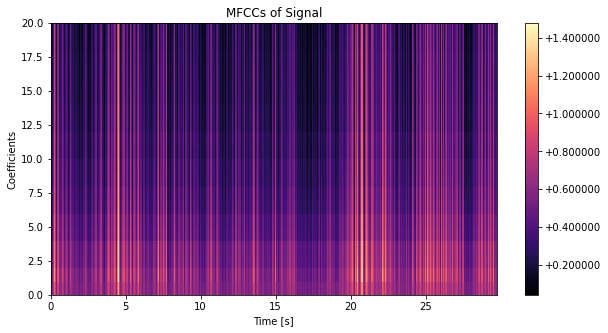

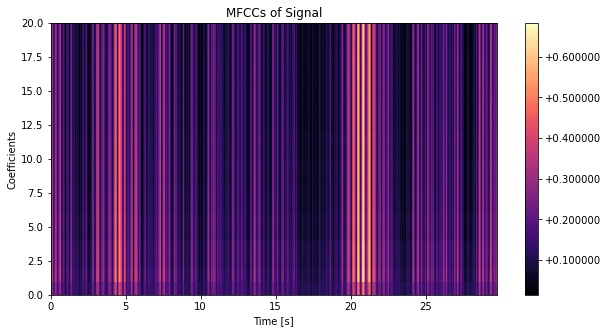

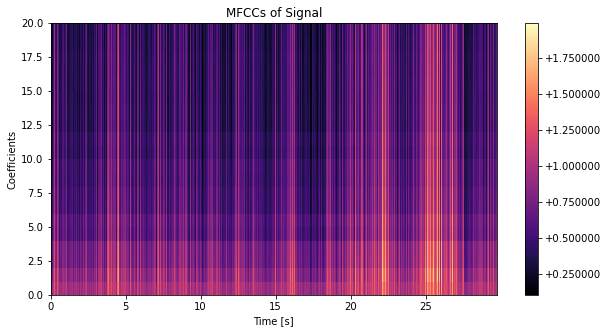

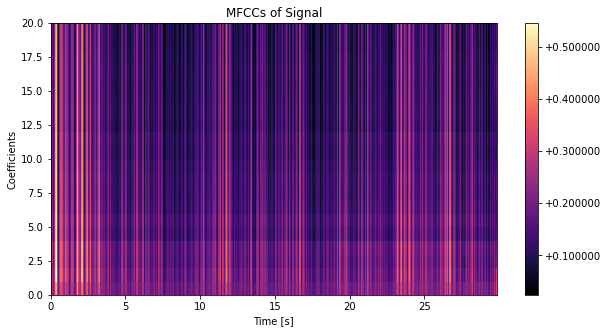

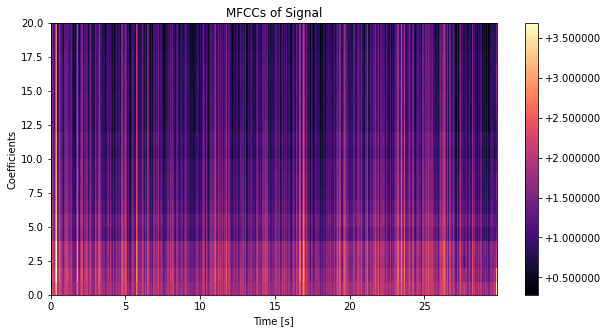

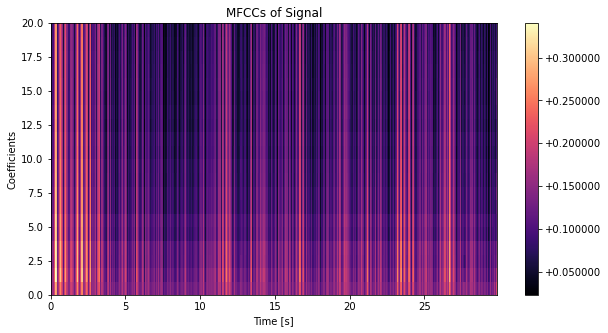

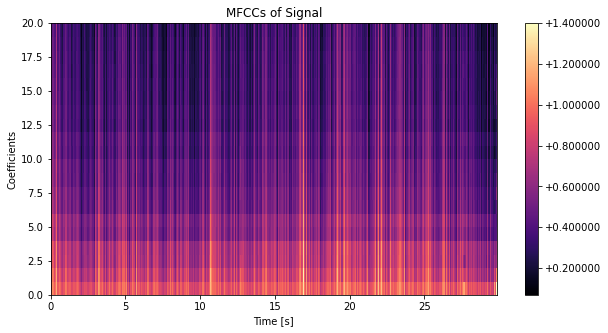

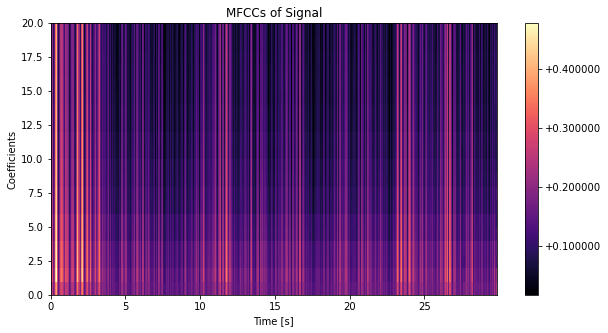

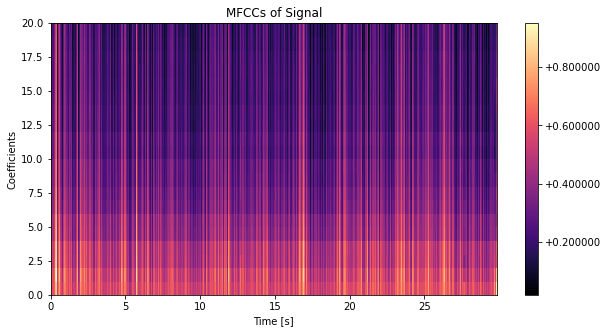

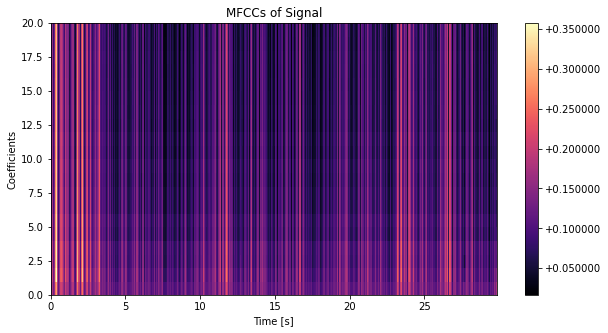

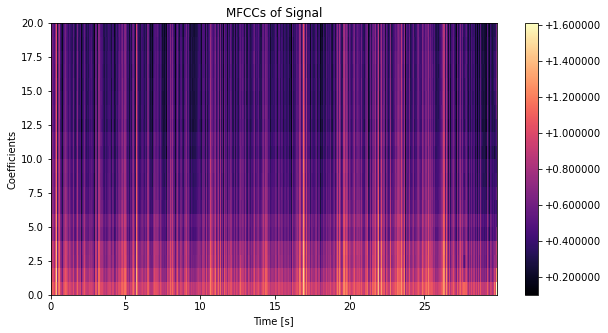

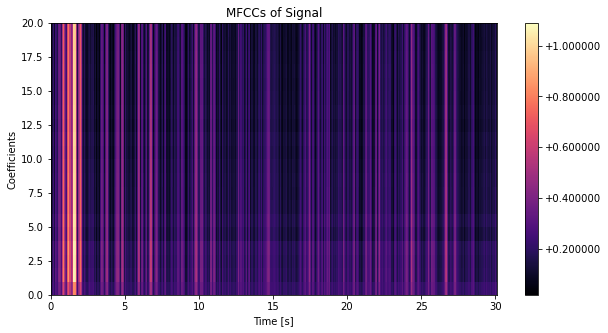

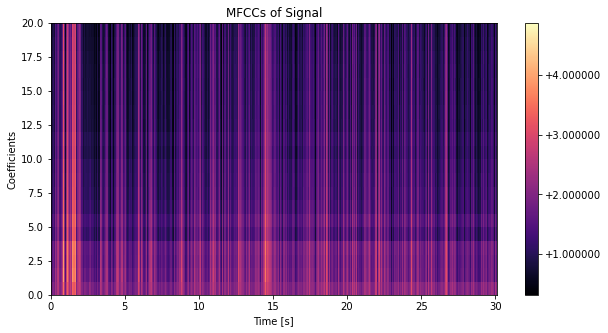

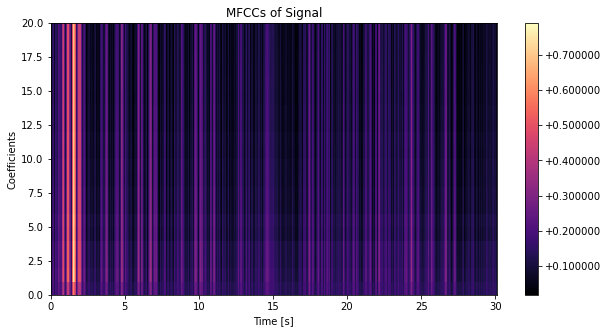

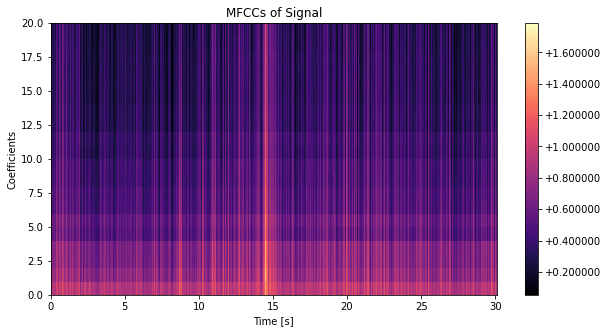

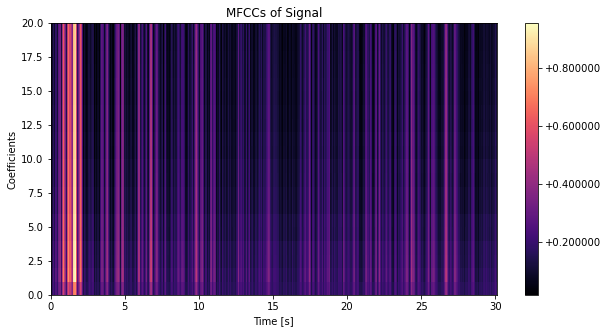

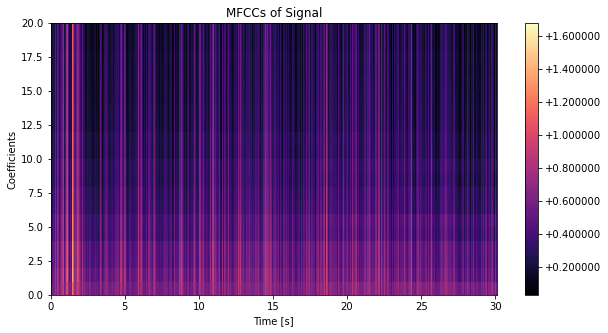

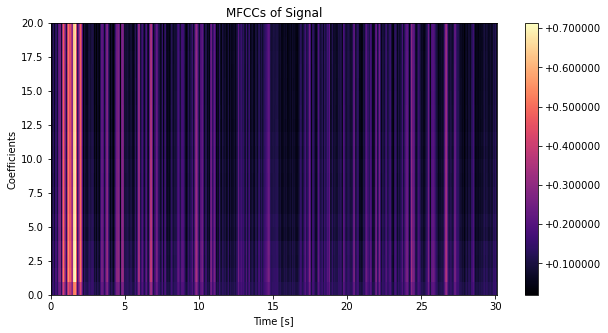

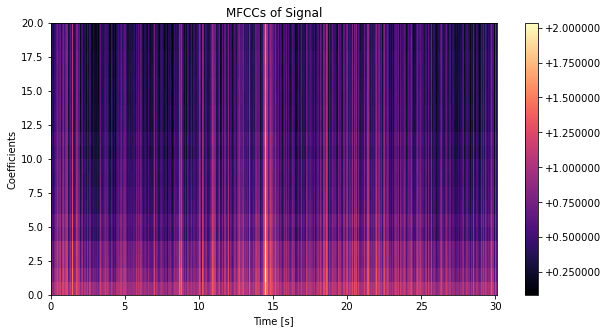

In [11]:
for mfcc in mfccs_no_leak:
    plot_mfcc(mfcc)